In [1]:
cd ..

/home/av/gitprojects/manydepth


In [2]:
IMG_PATH = 'data/cityscapes/dump/aachen/aachen_000171_000022.jpg'
CALIB_PATH = 'data/cityscapes/dump/aachen/aachen_000171_000022_cam.txt'

In [12]:
import numpy as np
import mmcv
import torch
import torch.nn as nn
from manydepth.layers import BackprojectDepth
from avcv.visualize import *

In [4]:
RAW_WIDTH=1024
RAW_HEIGHT=384

In [5]:
def load_intrinsics(camera_file):
    # adapted from sfmlearner

    # camera_file = os.path.join(self.data_path, city, "{}_cam.txt".format(frame_name))
    # camera = np.loadtxt(camera_file, delimiter=",")
    # fx = camera[0]
    # fy = camera[4]
    # u0 = camera[2]
    # v0 = camera[5]
    cam = mmcv.load(camera_file)['intrinsic']
    intrinsics = np.array([[cam['fx'], 0, cam['u0'], 0],
                           [0, cam['fy'], cam['v0'], 0],
                           [0,  0,  1, 0],
                           [0,  0,  0, 1]]).astype(np.float32)

    # intrinsics[0, :] /= img_shape[1]
    # intrinsics[1, :] /= img_shape[0]
    return intrinsics

In [7]:
CALIB_PATH = 'data/cityscapes/camera_trainvaltest/camera/test/leverkusen/leverkusen_000039_000019_camera.json'
IMG_PATH = 'data/cityscapes/leftImg8bit_sequence/test/leverkusen/leverkusen_000039_000019_leftImg8bit.png'

In [8]:
img = mmcv.imread(IMG_PATH)
K = load_intrinsics(CALIB_PATH)
inv_K = np.linalg.inv(K)
K = torch.from_numpy(K)
inv_K = torch.from_numpy(inv_K)


In [9]:
depth = np.load('splits/cityscapes/gt_depths/000_depth.npy')

depth = torch.from_numpy(depth)[None, None]

In [19]:
ds = depth[0,0]/depth[0,0].max()
ds = ds.cpu().numpy()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

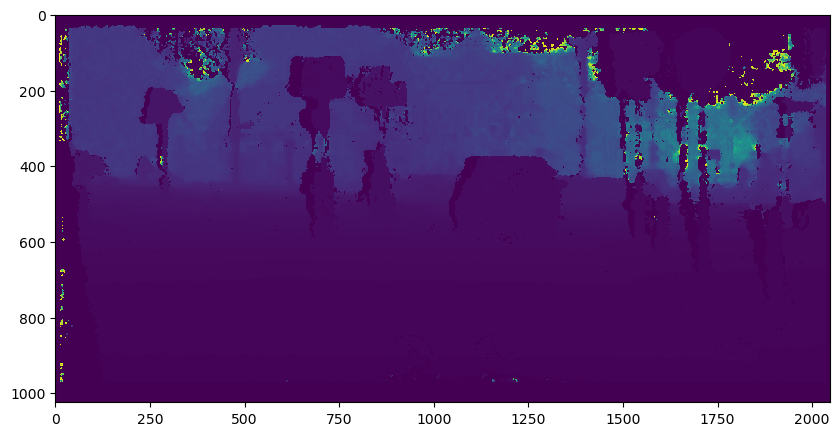

In [24]:
show(ds, cmap='viridis')

In [16]:
bd_layer = BackprojectDepth(1, *img.shape[:2])

In [90]:
cam_3d_points = bd_layer(depth, inv_K[None])

In [95]:
np.save('3d.npy', cam_3d_points.cpu().numpy())